Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load The Data

In [2]:
df=pd.read_csv(r"A:\my_codes\my_project\Advanced Machine Learning\Ensemble Model\Bagging\Random Forest\Employee Attrition Prediction\Dataset01-Employee_Attrition.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Dataset Size

In [3]:
df.shape

(14999, 10)

List Of Columns

In [4]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='str')

Data Type Of Columns

In [5]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                   str
salary                       str
dtype: object

Data Information

In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  str    
 9   salary                 14999 non-null  str    
dtypes: float64(2), int64(6), str(2)
memory usage: 1.3 MB


Checking For Duplicate Records

In [7]:
df[df.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Drop Duplicate Record/Rows

In [8]:
df1 = df.drop_duplicates()
df1.shape

(11991, 10)

Check For Missing Values

In [9]:
df1.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

Data Exploration And Visualization

In [10]:
df1['left'].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

<Axes: xlabel='left'>

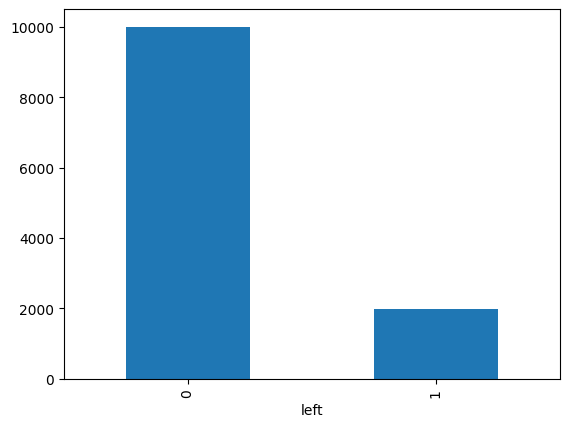

In [11]:
df1['left'].value_counts().plot(kind='bar')

In [12]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Impact Of Salary On Employee Retention

In [13]:
pd.crosstab(df1.salary,df1.left)

left,0,1
salary,,
high,942,48
low,4566,1174
medium,4492,769


<Axes: xlabel='salary'>

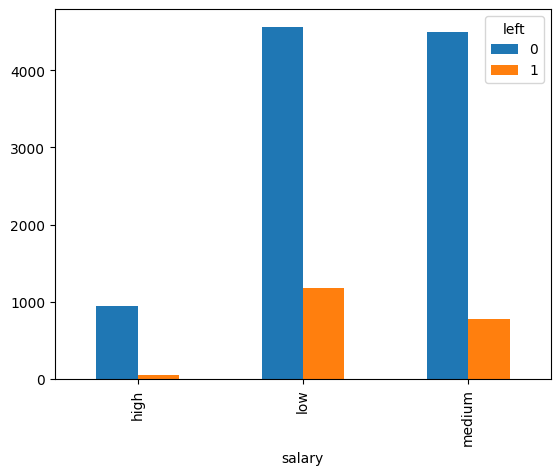

In [14]:
pd.crosstab(df1.salary,df1.left).plot(kind='bar')

Department Wise Employee Retention Rate

In [15]:
pd.crosstab(df1.Department,df1.left)

left,0,1
Department,,
IT,818,158
RandD,609,85
accounting,512,109
hr,488,113
management,384,52
marketing,561,112
product_mng,576,110
sales,2689,550
support,1509,312


<Axes: xlabel='Department'>

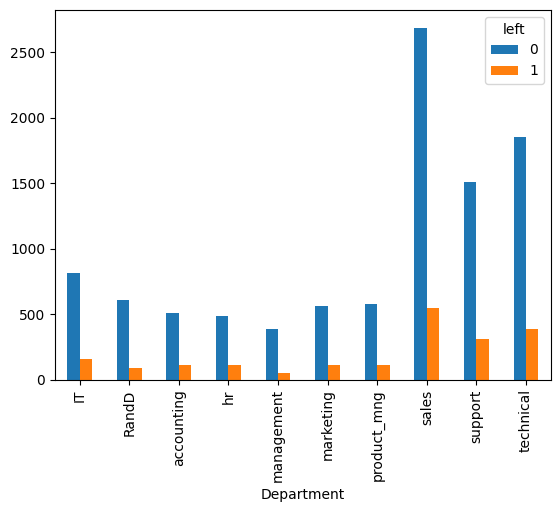

In [16]:
pd.crosstab(df1.Department,df1.left).plot(kind='bar')

Distribution Of Each Numerical Features

In [17]:
num_feature_list1 = [f for f in df1.columns if df1.dtypes[f] == 'float64']
num_feature_list1

['satisfaction_level', 'last_evaluation']

In [18]:
num_feature_list2 = [f for f in df1.columns if df1.dtypes[f] == 'int64']
num_feature_list2

['number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years']

In [19]:
num_cols_list = ['number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years','satisfaction_level', 'last_evaluation',]
 

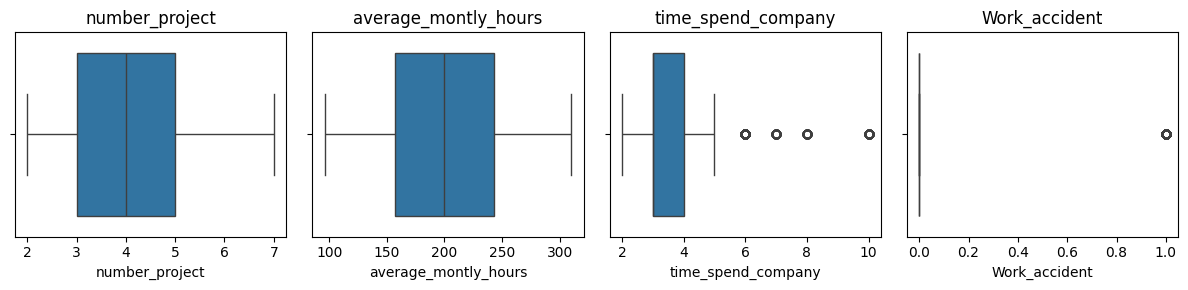

In [20]:
fig, axes = plt.subplots(ncols = 4 ,figsize = (12,3))
for column, axis in zip(num_cols_list[:4], axes):
    sns.boxplot(x = df1[column], ax = axis)
    axis.set_title(column)
plt.tight_layout()
plt.show()

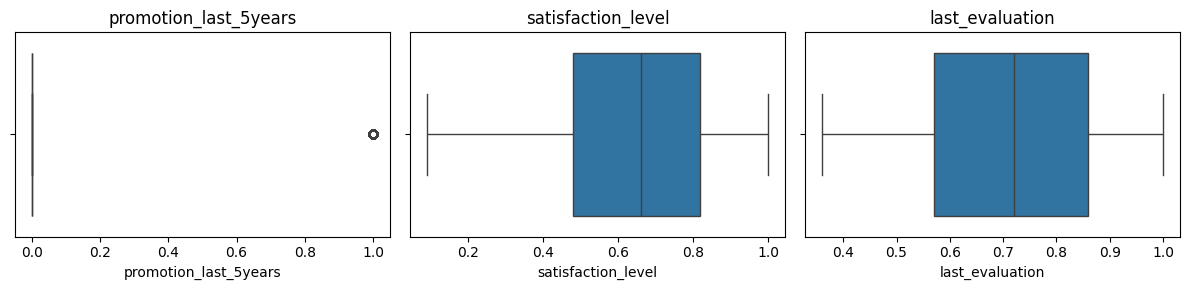

In [21]:
fig, axes = plt.subplots(ncols = 3 ,figsize = (12,3))
for column, axis in zip(num_cols_list[4:], axes):
    sns.boxplot(x = df1[column], ax = axis)
    axis.set_title(column)
plt.tight_layout()
plt.show()

<Axes: ylabel='Frequency'>

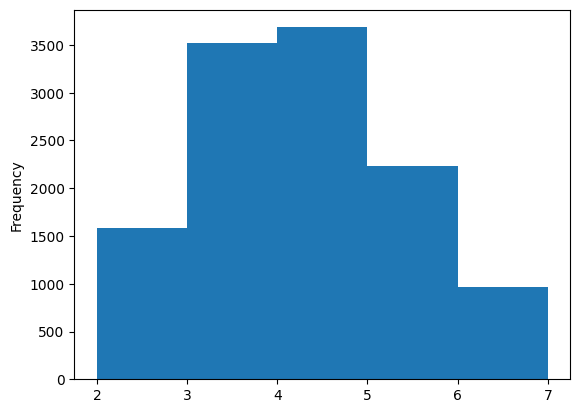

In [22]:
df1['number_project'].plot(kind='hist', bins=5)

<Axes: ylabel='Frequency'>

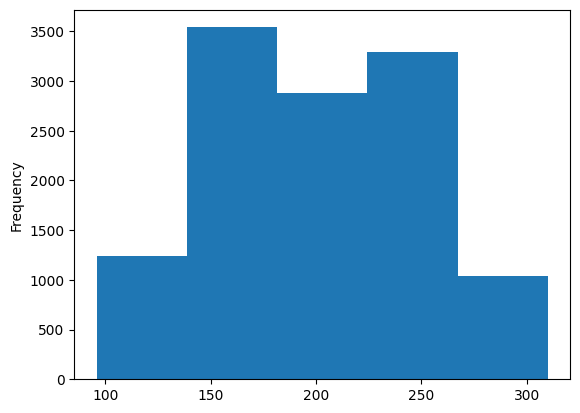

In [23]:
df1['average_montly_hours'].plot(kind='hist', bins=5)

<Axes: ylabel='Frequency'>

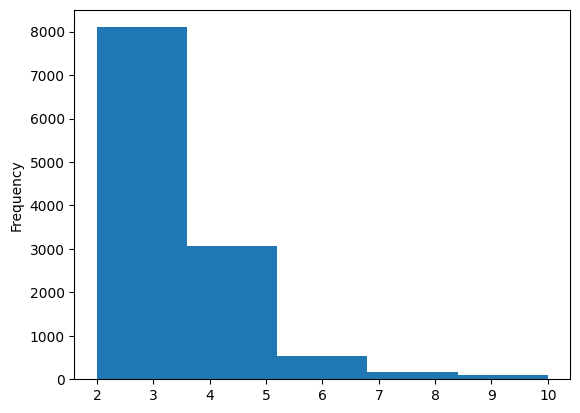

In [24]:
df1['time_spend_company'].plot(kind='hist', bins=5)

<Axes: ylabel='Frequency'>

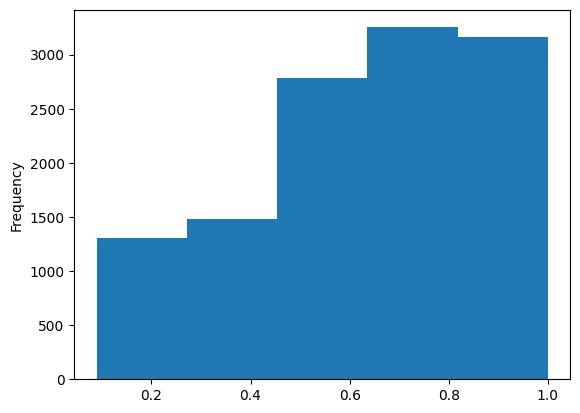

In [25]:
df1['satisfaction_level'].plot(kind='hist', bins=5)

<Axes: ylabel='Frequency'>

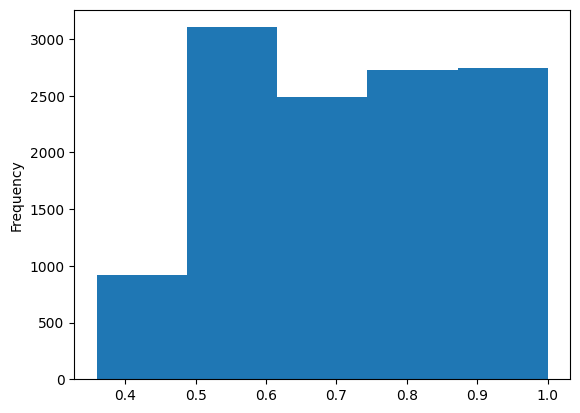

In [26]:
df1['last_evaluation'].plot(kind='hist', bins=5)

# Feature Engineering :
Label Encoding : Converting Categorical Features Into Numerical

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [28]:
df1['salary'] = LabelEncoder().fit_transform(df1['salary'])
df1['Department'] = LabelEncoder().fit_transform(df1['Department'])

In [29]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


Dependent[Target] and Independent Variable

In [30]:
x = df1.drop('left', axis=1)
y = df1['left']

Splitting Data Into Training And Testing

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
x_train.shape

(9592, 9)

In [33]:
x_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
6426,0.86,0.56,5,141,2,0,0,7,2
288,0.82,0.91,5,232,5,0,0,9,1
5051,0.62,0.52,3,148,3,0,0,7,2
11132,0.43,0.74,4,129,6,0,0,3,2
3687,0.85,0.79,3,156,3,0,0,7,2


Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
xtrain_scaled = scaler.fit_transform(x_train)
xtest_scaled = scaler.transform(x_test)

In [36]:
xtrain_scaled
xtest_scaled

array([[-2.22616534,  0.4312433 ,  1.89275291, ..., -0.13311211,
         0.39533766, -0.56181526],
       [ 0.4636721 ,  1.44221642,  0.17048512, ..., -0.13311211,
         0.74073148,  1.0287786 ],
       [ 0.7533469 ,  1.50168543,  0.17048512, ..., -0.13311211,
         0.39533766, -0.56181526],
       ...,
       [ 0.7533469 , -0.34185379, -0.69064878, ..., -0.13311211,
         0.39533766,  1.0287786 ],
       [ 0.29814364,  1.56115444,  0.17048512, ..., -0.13311211,
        -0.29544999, -0.56181526],
       [ 0.09123307, -0.10397776, -0.69064878, ..., -0.13311211,
         0.74073148, -0.56181526]], shape=(2399, 9))

# Model Development :
Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

Model Training

In [38]:
rf.fit(xtrain_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [39]:
y_pred = rf.predict(xtest_scaled)
y_pred

array([1, 0, 0, ..., 0, 0, 0], shape=(2399,))

# Model Evaluation :
Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1991    7]
 [  39  362]]


<Axes: >

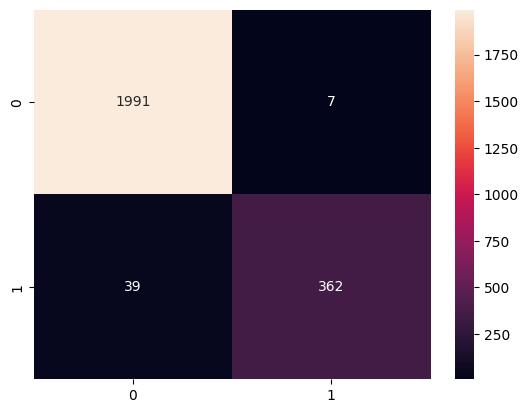

In [41]:
sns.heatmap(cm, annot=True, fmt='d')

Accuracy

In [42]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model = " , accuracy)

Accuracy of the model =  0.9808253438932889


Precision

In [43]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("Precision of the model = " , precision)

Precision of the model =  0.981029810298103


Recall

In [44]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("Recall of the model = " , recall)

Recall of the model =  0.9027431421446384


F1-Score

In [45]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("F1 Score of the model = " , f1)

F1 Score of the model =  0.9402597402597402


Classification Report

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1998
           1       0.98      0.90      0.94       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



Feature Importance Matrix In Random Forest/Feature Extraction

In [47]:
score_list = rf.feature_importances_
list_of_features = list(x.columns)
score_df = pd.DataFrame({'Feature':list_of_features, 'Score':score_list})
score_df.sort_values(by='Score', ascending=False)

,Feature,Score
0,satisfaction_level,0.338396
2,number_project,0.191107
4,time_spend_company,0.167801
3,average_montly_hours,0.155829
1,last_evaluation,0.121360
7,Department,0.012515
8,salary,0.007717
5,Work_accident,0.004490
6,promotion_last_5years,0.000785


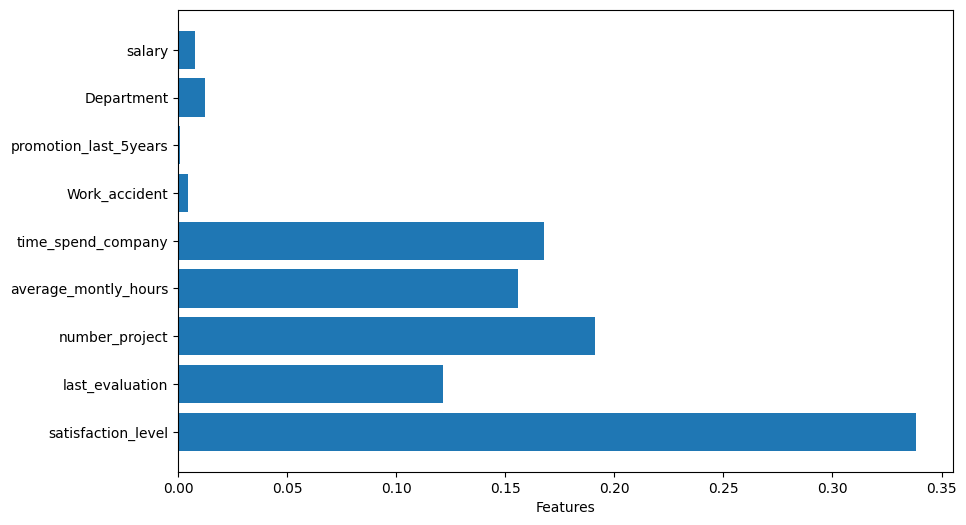

In [48]:
list_of_features = list(x.columns)
plt.figure(figsize=(10,6))
plt.barh(range(len(list_of_features)), rf.feature_importances_)
plt.yticks(range(len(list_of_features)), list_of_features)
plt.xlabel('Features')
plt.show()

K-fold Cross Validation

In [49]:
from sklearn.model_selection import cross_val_score
scorers = cross_val_score(rf,xtrain_scaled,y_train,cv=5, scoring='accuracy')
print("Cross Validation scores for each fold: ", scorers)

Cross Validation scores for each fold:  [0.9885357  0.98332465 0.98435871 0.98592284 0.98748697]


In [50]:
avg_model_score = scorers.mean()
print("Average Cross Validation Score: ", avg_model_score)


Average Cross Validation Score:  0.9859257705585058


# Hyper Parameter Tuning :
Grid Search CV | Random Search CV

In [51]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

List Of Parameters

In [52]:
parameters = {
    'n_estimators': [50, 100],
    'max_features': ['sqrt', 'log2', None]
}

Search for Best Parameters

In [53]:
grid_search = GridSearchCV(estimator=rf, param_grid=parameters)
grid_search.fit(xtrain_scaled, y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'max_features': ['sqrt', 'log2', ...], 'n_estimators': [50, 100]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


Best Parameters

In [54]:
grid_search.best_params_

{'max_features': 'sqrt', 'n_estimators': 50}

Building New Model With Best Parameters

In [55]:
rf_new = RandomForestClassifier(max_features='log2', n_estimators=50)
rf_new.fit(xtrain_scaled, y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


K-fold Cross Validation : K=5

In [56]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_new, xtrain_scaled, y_train, cv=5, scoring='accuracy')
print("Cross Validation scores for each fold with new parameters: ", scores)

Cross Validation scores for each fold with new parameters:  [0.98801459 0.98280354 0.98488008 0.98592284 0.98748697]


Average Accuracy Scores Of Cross Validation

In [57]:
avg_model_score = scores.mean()
print("Average Cross Validation Score: ", avg_model_score)

Average Cross Validation Score:  0.9858216039484416


<h2 style="color: var(--vscode-editorKeyword-foreground);">
📌 Project Summary: Employee Attrition Prediction
</h2>

<p>
This project presents an end-to-end machine learning solution for predicting employee attrition using structured HR data. The analysis began with comprehensive data preprocessing, including duplicate removal, missing value verification, and exploratory data analysis (EDA) to understand employee behavior across departments, salary levels, and work-related attributes.
</p>

<p>
Categorical features such as <b>Department</b> and <b>Salary</b> were transformed using label encoding, followed by splitting the dataset into training and testing subsets. A <b>Random Forest Classifier</b> was implemented to model complex, non-linear relationships and provide robust predictive performance.
</p>

<p>
Model evaluation was conducted using multiple metrics, including <b>accuracy, precision, recall, F1-score</b>, and a <b>confusion matrix</b>, ensuring a comprehensive assessment of classification performance. Feature importance analysis was performed to identify the most influential variables contributing to employee attrition.
</p>

<p>
To improve model reliability and generalization, <b>K-fold cross-validation</b> was applied. Additionally, <b>Grid Search Cross-Validation</b> was used for hyperparameter tuning, optimizing key parameters such as the number of estimators and feature selection strategy. The final tuned model demonstrated improved and stable performance across validation folds.
</p>

<p>
Overall, this project demonstrates practical expertise in data preprocessing, supervised learning, model evaluation, and hyperparameter optimization, while delivering actionable insights for workforce analytics and retention strategy development.
</p>
